# Deep Learning 2019
## Assignment 6 - Regularization
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __June 4th, 2019, 9AM__. Before your submission please replace fields __[Name]__ and __[Mat. No.]__ with your own name and registration number respectively (please keep the brackets), and replace the __X__ in the filename with the number of the current assignment.

Programming assignments have to be completed using Python 3. __Please do NOT use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Solving regularization by hand

Consider $\mathbf{x} = \left(\begin{matrix}−1 &1\end{matrix}\right)^T$ with output $y = 2$ and the network below:

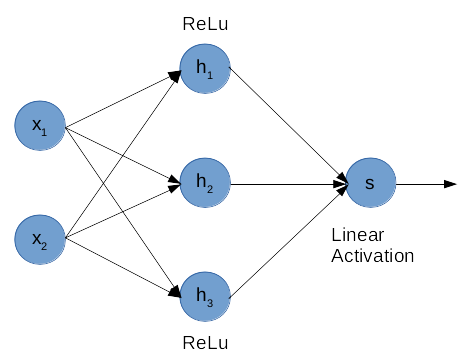

where:
$$
\mathbf{W}_h = \left(\begin{matrix}
                    1  &  1\\
                    -1 &  2\\
                    0  & -2
        \end{matrix}\right),\\
\mathbf{W}_s = \left(\begin{matrix}1 &-1 &2\end{matrix}\right)
$$
and 
$$
Learning\ Rate = 0.01,\\
Regularization\ Penalty = 0.5
$$

1. Perform a forward and backward pass without Regularization
2. From scratch, perform a backward pass using L1-Regularization. (Use penalty as described in the picture).
3. Comment on the results for 1. and 2.

#### solution
1. 
Forward:
\begin{equation}
\mathbf{z} = \mathbf{W}_h\mathbf{x} = \left(\begin{matrix}0\\3\\-2\end{matrix}\right)\\
\mathbf{h}=g_{h}(\mathbf{z})=\left(\begin{matrix}0\\3\\0\end{matrix}\right)\\
\hat{y} = g_s(s) = g_s(\mathbf(W)_s\mathbf{z}) =-3.
\end{equation}
Assume loss function is squared error, the loss is then
\begin{equation}
\mathcal{L}(f(x), y)=(-3-2)^2=25
\end{equation}
Backward:
\begin{equation}
\frac{\partial}{\partial }
\end{equation}







#### Solution
1. 
Forward pass:
$$
y = \mathbf{W}_s \text{relu} \left( \mathbf{W}_h \mathbf{x} \right) = 
    \left(\begin{matrix}1 &-1 &2\end{matrix}\right)
    \text{relu}(\left(\begin{matrix}
                               1  &  1\\
                               -1 &  2\\
                               0  & -2
                    \end{matrix}\right) 
        \left(\begin{matrix}
            -1\\
            1
        \end{matrix}\right)
    ) \\
   =   \left(\begin{matrix}1 &-1 &2 \end{matrix}\right)
        \left(\begin{matrix}
            0\\
            3\\
            0
        \end{matrix}\right)  
   = -3
$$
Loss:
$$
J = \frac{1}{2}( y_e - y)^2 = \frac{1}{2}( 2 - (-3))^2 = 12.5\\
\frac{\partial J}{\partial y} = -( y_e - y) = -2 + (-3) = -5
$$
Backpropagation:
$$
\frac{\partial J}{\partial \mathbf{W}_s} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial \mathbf{W}_s} = -5 \frac{\partial y}{\partial \mathbf{W}_s}=
    \left(\begin{matrix} 0 & -15 & 0 \end{matrix}\right)
$$
$$
\frac{\partial J}{\partial \mathbf{W}_h} = 
\frac{\partial J}{\partial \mathbf{y}} (\frac{\partial \mathbf{y}}{\partial\mathbf{g}}  \cdot \frac{\partial\mathbf{g_h}}{\partial\mathbf{h}}) \frac{\partial \mathbf{h}}{\partial \mathbf{W}_h} = 
-5 \mathbf{W}_s \frac{\partial h}{\partial \mathbf{W}} = 
-5 (\left(\begin{matrix}
        1 \\
        -1 \\
        2 
    \end{matrix}\right)  \otimes
    \left(\begin{matrix}
    1\\
    1\\
    0
    \end{matrix}\right))
    \left(\begin{matrix} -1 & 1 \end{matrix}\right) =
\left(\begin{matrix}
    5  & -5\\
    -5 & 5\\
    0  & 0
\end{matrix}\right)
$$
or (depends on how do you interprete the derivation of the RELU function at 0)
$$
\frac{\partial J}{\partial \mathbf{W}_h} = 
\frac{\partial J}{\partial \mathbf{y}} (\frac{\partial \mathbf{y}}{\partial\mathbf{g}}  \otimes \frac{\partial \mathbf{g_h}}{\partial \mathbf{h}}) \frac{\partial \mathbf{h}}{\partial \mathbf{W}_h} = 
-5 \mathbf{W}_s \frac{\partial h}{\partial \mathbf{W}} = 
-5 (\left(\begin{matrix}
        1 \\
        -1 \\
        2 
    \end{matrix}\right)  \otimes
    \left(\begin{matrix}
    0\\
    1\\
    0
    \end{matrix}\right))
    \left(\begin{matrix} -1 & 1 \end{matrix}\right) =
\left(\begin{matrix}
    0  & 0\\
    -5 & 5\\
    0  & 0
\end{matrix}\right)
$$
Update:
$$
\mathbf{W}'_s = \mathbf{W}_s - \eta \frac{\partial J}{\partial \mathbf{W}_s} =
\left(\begin{matrix}1 & -1 &2\end{matrix}\right) - 0.01 \left(\begin{matrix} 0 & -15 & 0 \end{matrix}\right) = \left(\begin{matrix}1 & -0.85 & 2\end{matrix}\right)
$$
$$
\mathbf{W}'_h = \mathbf{W}_h - \eta \frac{\partial J}{\partial \mathbf{W}_h} = 
\left(\begin{matrix}
    1  &  1\\
    -1 &  2\\
    0  & -2
\end{matrix}\right) - 0.01 
\left(\begin{matrix}
    5  & -5\\
    -5 & 5\\
    0  & 0
\end{matrix}\right) = 
\left(\begin{matrix}
    0.95  & 1.05\\
    -0.95 & 1.95\\
    0  & -2
\end{matrix}\right)
$$
or (depends on how do you interprete the derivation of the RELU function at 0)
$$
\mathbf{W}'_h = \mathbf{W}_h - \eta \frac{\partial J}{\partial \mathbf{W}_h} = 
\left(\begin{matrix}
    1  &  1\\
    -1 &  2\\
    0  & -2
\end{matrix}\right) - 0.01 
\left(\begin{matrix}
    0  & 0\\
    -5 & 5\\
    0  & 0
\end{matrix}\right) = 
\left(\begin{matrix}
    1 & 1\\
    -0.95 & 1.95\\
    0  & -2
\end{matrix}\right)
$$

2. 
Forward pass (with $\mathcal{L}_1$ regularization):
$$
y = \mathbf{W}_s \text{relu} \left( \mathbf{W}_h \mathbf{x} \right) = 
    \left(\begin{matrix}1 &-1 &2\end{matrix}\right)
    \text{relu}(\left(\begin{matrix}
                               1  &  1\\
                               -1 &  2\\
                               0  & -2
                    \end{matrix}\right) 
        \left(\begin{matrix}
            -1\\
            1
        \end{matrix}\right)
    ) \\
   =   \left(\begin{matrix}1 &-1 &2 \end{matrix}\right)
        \left(\begin{matrix}
            0\\
            3\\
            0
        \end{matrix}\right)  
   = -3
$$
Loss:
Assume we apply $\mathcal(L)_1$ regularization on all kernels (on both $\mathbf{W}_s$ and $\mathbf{W}_h$), the loss turns to be
$$
\mathcal{L} = J + \lambda( ||\mathbf{W}_h||_1 + ||\mathbf{W}_s||_1).
$$
And
Partial dirivitives:
$$
\frac{\partial\mathcal{L}}{\partial \mathbf{W}_s} = 
\frac{\partial J}{\partial \mathbf{W}_s} + \lambda sign(\mathbf{W}_s) = 
\left(\begin{matrix} 0 & -15 & 0 \end{matrix}\right) + 0.5\left(\begin{matrix}1 & -1 & 1\end{matrix}\right) = 
\left(\begin{matrix} 0.5 & -15.5 & 0.5 \end{matrix}\right)
$$
$$
\frac{\partial\mathcal{L}}{\partial\mathbf{W}_h} = 
\frac{\partial J}{\partial \mathbf{W}_h} + \lambda sign(\mathbf{W}_h) = 
    \left(\begin{matrix}
        5  & -5\\
        -5 & 5\\
        0  & 0
    \end{matrix}\right) + 0.5
    \left(\begin{matrix}
        1  & 1\\
        -1 & 1\\
        0  & -1
    \end{matrix}\right) = 
\left(\begin{matrix}
    5.5  & -4.5\\
    -5.5 & 5.5\\
    0    & -0.5
\end{matrix}\right)
$$
Update:
$$
\mathbf{W}'_s = \mathbf{W}_s - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}_s} =
\left(\begin{matrix}1 & -1 & 2\end{matrix}\right) - 0.01 \left(\begin{matrix} 0.5 & -15.5 & 0.5 \end{matrix}\right) =
\left(\begin{matrix}0.995 & -0.845 & 1.995\end{matrix}\right)
$$
$$
\mathbf{W}'_h = \mathbf{W}_h - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}_h} = 
\left(\begin{matrix}
    1  &  1\\
    -1 &  2\\
    0  & -2
\end{matrix}\right) - 0.01 
\left(\begin{matrix}
    5.5  & -4.5 \\
    -5.5 & 5.5 \\
    0    & -0.5
\end{matrix}\right) = 
\left(\begin{matrix}
    0.945  & 1.045\\
    -0.945 & 1.945\\
    0      & -1.945
\end{matrix}\right)
$$

3. Conclusion: The updated weight in a model with regularization term tend to be smaller than the ones in the model without regularization.

### 2. Dropout
1. Assume we have a neural network with ReLU activation function and want to perform aregression task, the weights (and therefore the structure) is given through:$$
\mathbf{W}_1 = \left(\begin{matrix}
    1 & 2\\
    -1 & 1\\
    2 & -1
\end{matrix}\right)
\space
\space
\mathbf{W}_2 = \left(\begin{matrix}
    1 & 2 & -2\\
    2 & -1 & 1
\end{matrix}\right)\\
\mathbf{W}_3 = \left(\begin{matrix}
    2  & 1\\
    -1 & -1
\end{matrix}\right)
\space
\space
\mathbf{v} = \left(\begin{matrix}1 & -1\end{matrix}\right)
$$
and
$$
\mathbf{b}_1 = \left(\begin{matrix}
    -1\\
    1\\
    2
\end{matrix}\right)
\space
\space
\mathbf{b}_2 = \left(\begin{matrix}
    2\\
    -1
\end{matrix}\right)
\space
\space
\mathbf{b}_3 = \left(\begin{matrix}
    1\\
    1
\end{matrix}\right)
\space
\space
b_4 = 1\space.
$$
Predict for the instance $x=\left(\begin{matrix}1 & 1\end{matrix}\right)^T$ twice, once using the following dropout masks and once without dropout:
$$
\mu_0 = \left(\begin{matrix}
    0\\
    1
\end{matrix}\right)
\space
\space
\mu_1 = \left(\begin{matrix}
    0\\
    1\\
    1
\end{matrix}\right)
\space
\space
\mu_2 = \left(\begin{matrix}
    1\\
    1
\end{matrix}\right)
$$
2. Explain why dropout is not used for bias nodes?

#### Solution
1. 
without dropout:
$$
\mathbf{h}_1 = \text{relu}( \mathbf{W}_1 (x) + \mathbf{b}_1) = 
\text{relu} ( \left(\begin{matrix}
    1 & 2\\
    -1 & 1\\
    2 & -1
\end{matrix}\right) 
\left( \begin{matrix} 1 \\ 1 \end{matrix} \right) + 
\left(\begin{matrix}
    -1\\
    1\\
    2
\end{matrix}\right)) = 
\left( \begin{matrix} 2 \\ 1 \\ 3 \end{matrix} \right)
$$
$$
\mathbf{h}_2 = \text{relu}( \mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2 ) = 
\text{relu}( 
    \left(\begin{matrix}
        1 & 2 & -2\\
        2 & -1 & 1
    \end{matrix}\right) 
    \left( \begin{matrix} 2 \\ 1 \\ 3 \end{matrix} \right) + 
    \left(\begin{matrix}
        2\\
        -1
    \end{matrix}\right)) = 
\left( \begin{matrix} 0 \\ 5 \end{matrix} \right)
$$
$$
\mathbf{h}_3 = \text{relu} ( \mathbf{W}_3 \mathbf{h}_2  + \mathbf{b}_3 ) = 
\text{relu} ( 
    \left(\begin{matrix}
        2 & 1\\
        -1 & -1
    \end{matrix}\right) 
    \left( \begin{matrix} 
        0 \\ 
        5 
    \end{matrix}\right) + 
    \left(\begin{matrix}
        1\\
        1
    \end{matrix}\right)) = 
\left( \begin{matrix} 
    6 \\ 
    0 \end{matrix} 
\right)
$$
$$
y = \text{relu}(\mathbf{v}\mathbf{h}_3 + b_4) = 
\text{relu}(
    \left(\begin{matrix}
        1 & -1
    \end{matrix}\right) 
    \left(\begin{matrix} 
        6 \\ 
        0 
    \end{matrix}\right) + 
    1) = 
7
$$
with dropout:
$$
\mathbf{h}_1 = \text{relu}(\mathbf{\mathbf{W}_1}(\mathbf{x}\otimes\mathbf{\mu}_0) + \mathbf{b}_1 ) = 
\text{relu} ( 
    \left(\begin{matrix}
        1 & 2\\
        -1 & 1\\
        2 & -1
    \end{matrix}\right) ( 
        \left( \begin{matrix} 
            1 \\ 
            1 
        \end{matrix} \right) \otimes 
        \left( \begin{matrix} 
            0 \\ 
            1 
        \end{matrix} \right)) + 
    \left(\begin{matrix}
        -1\\
        1\\
        2
    \end{matrix}\right)) = 
\left( \begin{matrix} 
    1 \\ 
    2 \\ 
    1 
\end{matrix} \right)
$$
$$
\mathbf{h}_2 = \text{relu}(\mathbf{W}_2(\mathbf{h}_1\otimes\mathbf{\mu}_1)+\mathbf{b}_2)= 
\text{relu}( 
    \left(\begin{matrix}
        1 & 2 & -2\\
        2 & -1 & 1
    \end{matrix}\right)
    (\left(\begin{matrix} 
        1 \\ 
        2 \\ 
        1 
    \end{matrix}\right) \otimes 
    \left( \begin{matrix} 
        0 \\ 
        1 \\ 
        1 
    \end{matrix} \right)) + 
    \left(\begin{matrix}
        2\\
        -1
    \end{matrix}\right)) = 
\left(\begin{matrix} 
    4 \\ 
    0 
\end{matrix} \right)
$$
$$
\mathbf{h}_3 = \text{relu} (\mathbf{W}_3(\mathbf{h}_2\otimes\mathbf{\mu}_2) + \mathbf{b}_3) = 
\text{relu}(
    \left(\begin{matrix}
        2 & 1\\
        -1 & -1
    \end{matrix}\right)    
    (\left(\begin{matrix} 
        4 \\ 
        0 
    \end{matrix}\right) \otimes 
    \left(\begin{matrix} 
        1 \\ 
        1 
    \end{matrix}\right)) + 
    \left(\begin{matrix}
        1\\
        1
    \end{matrix}\right)) = 
\left(\begin{matrix} 
    9 \\ 
    0 
\end{matrix}\right)
$$
$$
y = \text{relu}( \mathbf{v} \mathbf{h}_3 + b_4 ) = 
\text{relu} (
    \left(\begin{matrix}
        1 & -1
    \end{matrix}\right) 
    \left(\begin{matrix} 
        9 \\
        0 
    \end{matrix}\right) + 
    1) = 
10
$$

2. The biases typically require less data to fit accurately than the weights. Each weight specifies how two variables interact. Fitting the weight well requires observing both variables in a variety of conditions. Each bias controls only a single variable. This means that we do not induce too much variance by leaving the biases unregularized. Also, regularizing (using dropout) the bias parameters can introduce a significant amount of underfitting.

### 3. Data Augmentation
Jane Doe has a data-set that contains speech ".wav" files. However this data-set is not so big. Jane wants to build a model that reads the ".wav" files and classify the speaker as male or female. Suggest data augmentation methods that might help Jane and explain why augmentation helps with regularization.

#### solution
Jane can apply for example one or many of the following data augmentation methods:
1. Adding additive Gausian wight noise (AGWN) to the wav files. This helps the model to fight against the sampling noise while sampling the speeach stream.
2. Speed-up and down the speech stream while the pitch is held constant. This helps to avoid the model from overfitting to irrelevant features like speach speed.
3. Augment the speech file with band-rejection filter with some panelty (not to completely filter the rejection band but damp it with some rate)

### 4. Programming problem, regularization on xor problem
Recall that we have implemented in the 2nd assignment a feed-forward network using sklearn and numpy to solve XOR problem. In this problem we are going to do the same thing using keras, but also using L2 regularization. The network should be with one hidden layer and three hidden neurons. The size of the input layer is also set to two. Do not forget biases. Initialize the weights by drawing from a Gaussian distribution centered around zero, and learn the weights for the XOR data:

|$x_1$|$x_2$|$y$|
|----|----|---|
| 1  | 1  | 1 |
| -1 | 1  | 0 |
| 1  | -1 | 0 |
| -1 | -1 | 1 |


#### solution

In [2]:
import keras
import numpy as np
from keras.layers import Dense
from keras import regularizers
from keras.models import Sequential
from keras.utils import to_categorical
from keras.initializers import RandomNormal
from keras.optimizers import SGD
from scipy.special import softmax

Using TensorFlow backend.


In [72]:
x = np.array([
    [1,1],
    [-1,1],
    [1,-1],
    [-1,-1]
])
y = np.array([
    [1],
    [0],
    [0],
    [1]
])

In [90]:
model = Sequential()
model.add(Dense(2,# use_bias=True, 
                kernel_regularizer=regularizers.l2(0.01),
                activation='tanh', input_shape=(2,),
                kernel_initializer=RandomNormal(mean=0.0, stddev=10, seed=None),
                bias_initializer='zeros'))
model.add(Dense(1, activation='sigmoid', input_shape=(2,),
                kernel_initializer=RandomNormal(mean=0.0, stddev=10, seed=None)))

sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='MSE',
              metrics=['accuracy'])

In [29]:
model = Sequential()
model.add(Dense(3, use_bias=True, 
                kernel_regularizer=regularizers.l2(0.01),
                kernel_initializer=RandomNormal(mean=0.0, stddev=10, seed=None),
                input_dim=2,
                bias_initializer='zeros'))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [91]:
model.fit(x, y, batch_size=1, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 110ms/step - loss: 3.2543 - acc: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 3.2015 - acc: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.1492 - acc: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.0976 - acc: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 3.0467 - acc: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.9969 - acc: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 2.9478 - acc: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 8ms/step - loss: 2.8998 - acc: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.8531 - acc: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.8071 - acc: 0.5000
Epoch 11/1000
4/4 [==============================] - 0s 5ms/step 

4/4 [==============================] - 0s 8ms/step - loss: 0.3745 - acc: 0.7500
Epoch 174/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3699 - acc: 0.5000
Epoch 175/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3656 - acc: 0.5000
Epoch 176/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3614 - acc: 0.7500
Epoch 177/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3573 - acc: 0.7500
Epoch 178/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3534 - acc: 0.7500
Epoch 179/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.3497 - acc: 0.5000
Epoch 180/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3460 - acc: 0.7500
Epoch 181/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3425 - acc: 0.5000
Epoch 182/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.3391 - acc: 0.7500
Epoch 183/1000
4/4 [==============================] - 0s 9ms/step

4/4 [==============================] - 0s 6ms/step - loss: 0.0772 - acc: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0769 - acc: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0765 - acc: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0762 - acc: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0759 - acc: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0756 - acc: 1.0000
Epoch 351/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0752 - acc: 1.0000
Epoch 352/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0749 - acc: 1.0000
Epoch 353/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0746 - acc: 1.0000
Epoch 354/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0743 - acc: 1.0000
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step

4/4 [==============================] - 0s 7ms/step - loss: 0.0539 - acc: 1.0000
Epoch 518/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0538 - acc: 1.0000
Epoch 519/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0538 - acc: 1.0000
Epoch 520/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0537 - acc: 1.0000
Epoch 521/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0536 - acc: 1.0000
Epoch 522/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0536 - acc: 1.0000
Epoch 523/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0535 - acc: 1.0000
Epoch 524/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0534 - acc: 1.0000
Epoch 525/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0534 - acc: 1.0000
Epoch 526/1000
4/4 [==============================] - ETA: 0s - loss: 0.0582 - acc: 1.000 - 0s 5ms/step - loss: 0.0533 - acc: 1.0000
Epoch 527/1000
4/4 [=======

Epoch 603/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0491 - acc: 1.0000
Epoch 604/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0490 - acc: 1.0000
Epoch 605/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0490 - acc: 1.0000
Epoch 606/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0489 - acc: 1.0000
Epoch 607/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0489 - acc: 1.0000
Epoch 608/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0488 - acc: 1.0000
Epoch 609/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0488 - acc: 1.0000
Epoch 610/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0488 - acc: 1.0000
Epoch 611/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0487 - acc: 1.0000
Epoch 612/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0487 - acc: 1.0000
Epoch 613/1000
4/4 [==============================

4/4 [==============================] - 0s 7ms/step - loss: 0.0428 - acc: 1.0000
Epoch 776/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0428 - acc: 1.0000
Epoch 777/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0428 - acc: 1.0000
Epoch 778/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0427 - acc: 1.0000
Epoch 779/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0427 - acc: 1.0000
Epoch 780/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0427 - acc: 1.0000
Epoch 781/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0427 - acc: 1.0000
Epoch 782/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0426 - acc: 1.0000
Epoch 783/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0426 - acc: 1.0000
Epoch 784/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0426 - acc: 1.0000
Epoch 785/1000
4/4 [==============================] - 0s 5ms/step

Epoch 861/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0406 - acc: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0406 - acc: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0406 - acc: 1.0000
Epoch 864/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0405 - acc: 1.0000
Epoch 865/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0405 - acc: 1.0000
Epoch 866/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0405 - acc: 1.0000
Epoch 867/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0405 - acc: 1.0000
Epoch 868/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0405 - acc: 1.0000
Epoch 869/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0404 - acc: 1.0000
Epoch 870/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0404 - acc: 1.0000
Epoch 871/1000
4/4 [==============================

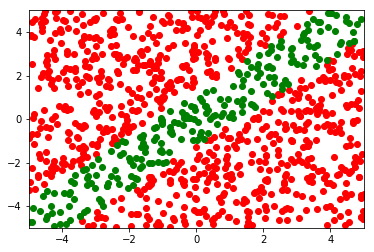

In [92]:
from matplotlib import pyplot as plt
from numpy.random import random
from numpy import hstack

x_test = random((1000, 2))*10-5
y_test = model.predict(x_test)
y_test = hstack((y_test, y_test))

plt.scatter(x_test[y_test < 0.5].reshape((-1, 2))[:, 0], x_test[y_test < 0.5].reshape((-1, 2))[:, 1], color='red', label='y = 1')
plt.scatter(x_test[y_test > 0.5].reshape((-1, 2))[:, 0], x_test[y_test > 0.5].reshape((-1, 2))[:, 1], color='green', label='y = 0')
#plt.scatter(x_test[y_test < 0.5][0], x_test[y_test < 0.5][1], color='blue', label='y = 0')
plt.axis([-5,5,-5,5])
plt.show()